In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

# Hands-on Activity 16.2: Logistic regression with many features

## Objectives

+ To demonstrate logistic regression with many features

## High melting explosives sensitivity
Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:
$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$
Let's load the data firs:

In [2]:
# Download the data file:
#url = 'https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/activities/hmx_data.csv'
#download(url)
# Load the data using pandas
import pandas as pd
data = pd.read_csv('hmx_data.csv')
# Extract data for regression
# Heights as a numpy array
x = data['Height'].values
# The labels must be 0 and 1
# We will use a dictionary to indicate our labeling
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1
5,40.5,E,1
6,40.5,E,1
7,40.5,E,1
8,40.5,E,1
9,40.5,E,1


Let's copy-paste the code we have written for putting together design matrices:

In [3]:
def get_polynomial_design_matrix(x, degree):
    """
    Returns the polynomial design matrix of ``degree`` evaluated at ``x``.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    # Start with an empty list where we are going to put the columns of the matrix
    cols = []
    # Loop over columns and add the polynomial
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

Now let's train a second degree model:

In [31]:
from sklearn.linear_model import LogisticRegression
degree = 1
# Make the design matrix
Phi = get_polynomial_design_matrix(x[:, None], degree)
# Train the model (penalty = 'none' means that we do not add a prior on the weights)
# we are effectively just maximizing the likelihood of the data
model = LogisticRegression(penalty='none', fit_intercept=False).fit(Phi, y)

Here are the model parameters:

In [32]:
model.coef_

array([[-12.68785875,   0.41143587]])

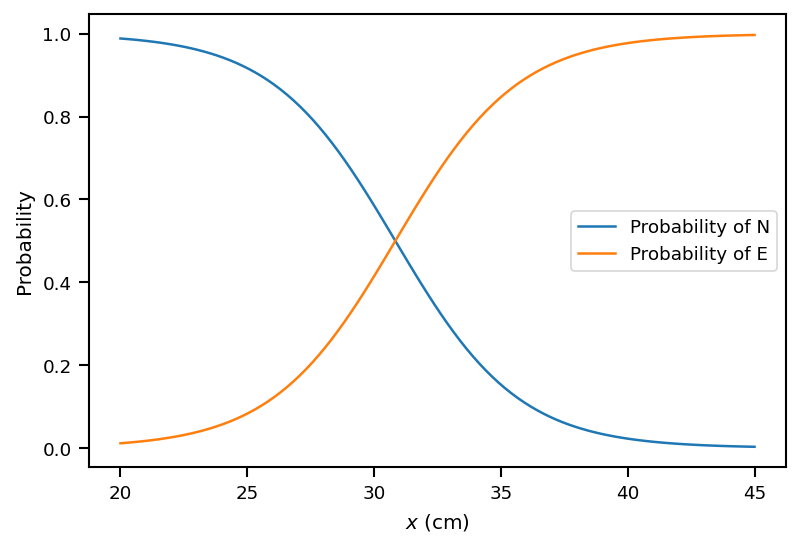

In [33]:
fig, ax = plt.subplots(dpi=150)
xx = np.linspace(20.0, 45.0, 100)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)
predictions_xx = model.predict_proba(Phi_xx)
ax.plot(xx, predictions_xx[:, 0], label='Probability of N')
ax.plot(xx, predictions_xx[:, 1], label='Probability of E')
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best');

### Questions

+ Do you think that it is worth going to a second degree model? Can you think of a way to compare the two models?
+ Rerun the code above with polynomial degree 3, 4, and 5. What do you observe? Do you trust the results? Why or why not?